<a href="https://colab.research.google.com/github/lauren-esser/Exploring_Mental_Health_with_SQL/blob/main/Mental_Health_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtain Data

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns


In [2]:
#connect to google drive
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [3]:
#move to home directory
%cd ~
%cd ..


/root
/


In [4]:
#list files in DataSets
!ls '/gdrive/My Drive/Colab Notebooks/DataSets'

chest-xray-pneumonia-jmi.zip  Megatable-2016.sql
cleaningpractice.zip	      mental_health.sqlite
country.csv		      ml-latest-small
dogs-vs-cats-sorted.zip       News_Category_Dataset_v2.json
IVE_tickbidask.txt


In [5]:
#dataset saved in my google drive
con = sqlite3.connect("/gdrive/My Drive/Colab Notebooks/DataSets/mental_health.sqlite")


In [6]:
#import answer dataset
answer = pd.read_sql('Select * From Answer', con)
answer.head()

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


In [7]:
#import survey dataset
survey = pd.read_sql('Select * FROM Survey', con)
survey.head()

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [8]:
#import question dataset
question = pd.read_sql('Select * FROM Question', con)
question.head()

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5


In [9]:
#merge question and answer data tables [survey not needed yet]
q_a = pd.read_sql('Select * FROM answer JOIN Question on answer.QuestionID = Question.questionid', con)
q_a.head()

,AnswerText,SurveyID,UserID,QuestionID,questiontext,questionid
0,37,2014,1,1,What is your age?,1
1,44,2014,2,1,What is your age?,1
2,32,2014,3,1,What is your age?,1
3,31,2014,4,1,What is your age?,1
4,31,2014,5,1,What is your age?,1


# Scrub Data

In [10]:
#check null
q_a.isna().sum()

AnswerText      0
SurveyID        0
UserID          0
QuestionID      0
questiontext    0
questionid      0
dtype: int64

**Exploring Questions**

In [11]:
print("Number of Questions:", q_a.questionid.nunique())

Number of Questions: 105


In [12]:
q_a.questiontext[3]

'What is your age?'

In [72]:
#questions with the most responses
q_a.questiontext.value_counts().sort_values(ascending = False)[:12]

Do you have a family history of mental illness?                                                                                                   4218
If you live in the United States, which state or territory do you live in?                                                                        4218
Would you bring up a mental health issue with a potential employer in an interview?                                                               4218
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?    4218
What is your age?                                                                                                                                 4218
What country do you live in?                                                                                                                      4218
Is your employer primarily a tech company/organization?                                       

In [14]:
print("Number of Unique Users:", q_a.UserID.nunique())

Number of Unique Users: 4218


**1. How many employees does your company or organization have?**

In [15]:
#find answers that correspond to above question
employees = q_a[q_a.questiontext == "How many employees does your company or organization have?"]
employees

,AnswerText,SurveyID,UserID,QuestionID,questiontext,questionid
8820,6-25,2014,1,8,How many employees does your company or organi...,8
8821,More than 1000,2014,2,8,How many employees does your company or organi...,8
8822,6-25,2014,3,8,How many employees does your company or organi...,8
8823,26-100,2014,4,8,How many employees does your company or organi...,8
8824,100-500,2014,5,8,How many employees does your company or organi...,8
...,...,...,...,...,...,...
206400,More than 1000,2019,4214,8,How many employees does your company or organi...,8
206401,-1,2019,4215,8,How many employees does your company or organi...,8
206402,-1,2019,4216,8,How many employees does your company or organi...,8
206403,More than 1000,2019,4217,8,How many employees does your company or organi...,8


In [16]:
employees.AnswerText.nunique()

7

In [17]:
employees.AnswerText.value_counts()

More than 1000    912
26-100            824
100-500           788
6-25              689
-1                504
1-5               254
500-1000          247
Name: AnswerText, dtype: int64

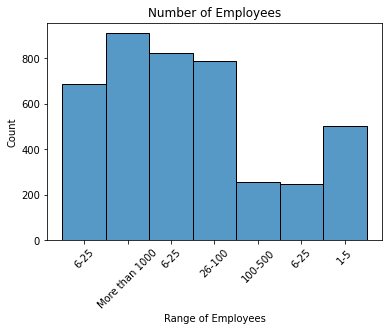

In [18]:
ax = sns.histplot(employees.AnswerText)

ax.set_title("Number of Employees")
ax.set_xlabel("Range of Employees")
labels = employees.AnswerText
ax.set_xticklabels(labels, rotation = 45);

In [19]:
experiment = [employees.AnswerText.value_counts()[4], employees.AnswerText.value_counts()[5], employees.AnswerText.value_counts()[3],
              employees.AnswerText.value_counts()[1], employees.AnswerText.value_counts()[2], employees.AnswerText.value_counts()[6], employees.AnswerText.value_counts()[0]]
experiment

[504, 254, 689, 824, 788, 247, 912]

**>> Come back to this and see if I can sort the x-axis**

**2. What country do you live in?**

In [20]:
#find answers that correspond to above question
country = q_a[q_a.questiontext == "What country do you live in?"]
country.head()

,AnswerText,SurveyID,UserID,QuestionID,questiontext,questionid
2520,United States,2014,1,3,What country do you live in?,3
2521,United States,2014,2,3,What country do you live in?,3
2522,Canada,2014,3,3,What country do you live in?,3
2523,United Kingdom,2014,4,3,What country do you live in?,3
2524,United States,2014,5,3,What country do you live in?,3


In [21]:
country.AnswerText.nunique()

81

In [22]:
country.AnswerText.value_counts()

United States of America    1853
United States                751
United Kingdom               482
Canada                       199
Germany                      136
                            ... 
Taiwan                         1
Guatemala                      1
Philippines                    1
Ecuador                        1
Saudi Arabia                   1
Name: AnswerText, Length: 81, dtype: int64

In [23]:
country.AnswerText.replace("United States of America", "United States", inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [24]:
country.to_csv(r'/gdrive/My Drive/Colab Notebooks/DataSets/country.csv', index = False)

In [30]:
%%HTML
<div class='tableauPlaceholder' id='viz1611768881518' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;YS&#47;YSHK28Z6C&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;YSHK28Z6C' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;YS&#47;YSHK28Z6C&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1611768881518');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**3. Family history of Mental Health?**




In [31]:
#find answers that correspond to above question
family = q_a[q_a.questiontext == "Do you have a family history of mental illness?"]
family.head()

,AnswerText,SurveyID,UserID,QuestionID,questiontext,questionid
6300,No,2014,1,6,Do you have a family history of mental illness?,6
6301,No,2014,2,6,Do you have a family history of mental illness?,6
6302,No,2014,3,6,Do you have a family history of mental illness?,6
6303,Yes,2014,4,6,Do you have a family history of mental illness?,6
6304,No,2014,5,6,Do you have a family history of mental illness?,6


In [32]:
family.AnswerText.value_counts()

Yes             1868
No              1701
I don't know     649
Name: AnswerText, dtype: int64

In [35]:
family.AnswerText.value_counts().to_csv(r'/gdrive/My Drive/Colab Notebooks/DataSets/family.csv')

In [36]:
%%HTML
<div class='tableauPlaceholder' id='viz1611769611137' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FamilyHistory_16117696017400&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FamilyHistory_16117696017400&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FamilyHistory_16117696017400&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1611769611137');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**4. What is your age?**

In [26]:
age = q_a[q_a.questionid == 1]
age.head()

,AnswerText,SurveyID,UserID,QuestionID,questiontext,questionid
0,37,2014,1,1,What is your age?,1
1,44,2014,2,1,What is your age?,1
2,32,2014,3,1,What is your age?,1
3,31,2014,4,1,What is your age?,1
4,31,2014,5,1,What is your age?,1


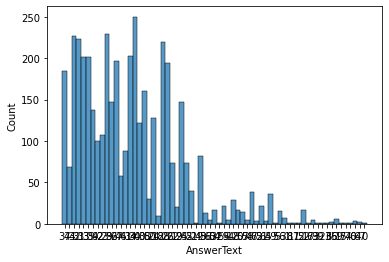

In [27]:
sns.histplot(age.AnswerText, bins = 10);

In [42]:
age.AnswerText.min()

'-1'

In [48]:
age.AnswerText.max()

'99'

In [56]:
age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 203940
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AnswerText    4218 non-null   int64 
 1   SurveyID      4218 non-null   int64 
 2   UserID        4218 non-null   int64 
 3   QuestionID    4218 non-null   int64 
 4   questiontext  4218 non-null   object
 5   questionid    4218 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 230.7+ KB


In [55]:
age.AnswerText = age.AnswerText.astype('int64')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [67]:
age_groups = pd.cut(age["AnswerText"], bins = [1, 20, 40, 60, 80, 100])
age.groupby(age_groups)

In [60]:
age.head()

,AnswerText,SurveyID,UserID,QuestionID,questiontext,questionid
0,37,2014,1,1,What is your age?,1
1,44,2014,2,1,What is your age?,1
2,32,2014,3,1,What is your age?,1
3,31,2014,4,1,What is your age?,1
4,31,2014,5,1,What is your age?,1


In [68]:
age.groupby(age_groups).head()

,AnswerText,SurveyID,UserID,QuestionID,questiontext,questionid
0,37,2014,1,1,What is your age?,1
1,44,2014,2,1,What is your age?,1
2,32,2014,3,1,What is your age?,1
3,31,2014,4,1,What is your age?,1
4,31,2014,5,1,What is your age?,1
5,33,2014,6,1,What is your age?,1
8,42,2014,9,1,What is your age?,1
12,42,2014,13,1,What is your age?,1
18,46,2014,19,1,What is your age?,1
22,46,2014,23,1,What is your age?,1


**5. What is your gender?**

In [73]:
#find answers that correspond to above question
gender = q_a[q_a.questiontext == "What is your gender?"]
gender.head()

,AnswerText,SurveyID,UserID,QuestionID,questiontext,questionid
1260,Female,2014,1,2,What is your gender?,2
1261,Male,2014,2,2,What is your gender?,2
1262,Male,2014,3,2,What is your gender?,2
1263,Male,2014,4,2,What is your gender?,2
1264,Male,2014,5,2,What is your gender?,2


In [77]:
gender.AnswerText.value_counts()

Male                                              3042
Female                                            1024
-1                                                  24
Nonbinary                                            8
non-binary                                           6
                                                  ... 
Other/Transfeminine                                  1
fm                                                   1
ostensibly male, unsure what that really means       1
genderfluid                                          1
Nah                                                  1
Name: AnswerText, Length: 99, dtype: int64

In [146]:
gender.AnswerText.nunique()

76

In [179]:
gender.AnswerText.replace(["male", "I have a penis", "MALE", "Male-ish", "Masculine",
                           "nb masculine", "something kinda male?", "Ostensibly Male",
                           "Cishet male", "masculino"], "Male", inplace = True)
gender.AnswerText.replace("ostensibly male, unsure what that really means", "Male", inplace = True)
gender.AnswerText.replace(["female", "fm", "Female-ish", "femmina", "AFAB", 
                           "Female-identified", "female-bodied; no feelings about gender"], "Female", inplace = True)
gender.AnswerText.replace(["None", "Enby", "none", "Agender", "agender", "Genderfluid", "Genderqueer",
                           "non-binary", "Non-binary", "genderfluid", "Fluid", "Male/genderqueer" 
                           "Genderqueer/non-binary", "Non binary", "Demiguy",
                           "Female or Multi-Gender Femme", "non binary", "fluid",
                           "Contextual", "Male (or female, or both)", "Nonbinary/femme",
                           "Non-binary and gender fluid", "NB", "Agender/genderfluid",
                           "male 9:1 female, roughly", "gender non-conforming woman",
                           "nonbinary","Genderflux demi-girl","Genderfluid (born female)", "Female assigned at birth",
                           "Female/gender non-binary.",  "uhhhhhhhhh fem genderqueer?", "genderqueer",
                           "Questioning", "Genderqueer demigirl", "Trans non-binary/genderfluid"], "Nonbinary", inplace = True)
gender.AnswerText.replace(["Trans woman", "Male (trans, FtM)", "Other/Transfeminine", "Female (trans)",
                           "Transgender woman", "male leaning androgynous", 
                           "Transfeminine", "Queer", "Male/genderqueer", "mtf",
                           "Androgyne", "Agender trans woman", "Trans man", 
                           "Woman-identified", "trans woman", "Trans female", "queer", 
                           "Trans-female", "male/androgynous", "queer/she/they",
                           "Guy (-ish) ^_^", "genderqueer woman", "transgender", "All",
                           "Bigender", "Transitioned, M2F", "Androgynous", "She/her/they/them"], "Transgender", inplace = True)




In [180]:
gender = gender[gender.AnswerText != "-1"]
gender = gender[gender.AnswerText != "Nah"]
gender = gender[gender.AnswerText != "A little about you"]
gender = gender[gender.AnswerText != "sometimes"]
gender = gender[gender.AnswerText != "none of your business"]
gender = gender[gender.AnswerText != "human"]
gender = gender[gender.AnswerText != "43"]
gender = gender[gender.AnswerText != "rr"]
gender = gender[gender.AnswerText != "Unicorn"]
gender = gender[gender.AnswerText != "Human"]
gender = gender[gender.AnswerText != "I am a Wookie"]
gender = gender[gender.AnswerText != "God King of the Valajar"]
gender = gender[gender.AnswerText != "p"]
gender = gender[gender.AnswerText != "\-"]
gender = gender[gender.AnswerText != "Neuter"]
gender = gender[gender.AnswerText != "SWM"]



In [181]:
gender.AnswerText.value_counts()

Male           3053
Female         1030
Nonbinary        64
Transgender      30
Other             2
Name: AnswerText, dtype: int64

> The above code was separated to the best of my ability using Google to help me understand the responses and what descriptions are synanoms of one another. If a section was categorized wrong please feel free to reach out so that I can respectfully correct the mistake. Thank you.

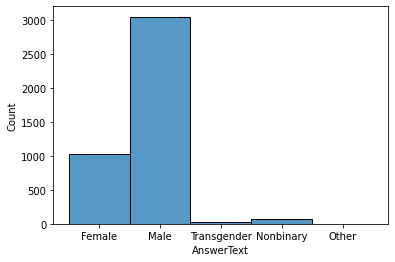

In [183]:
sns.histplot(gender.AnswerText);